In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import normalizar_datos

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X = normalizar_datos(X)

In [7]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for kernel in ['linear', 'poly', 'rbf']:
        for C in [0.1,0.5,1,5,10,15,20,25,30,50,75,100,200]: 
            kf = KFold(n_splits=5)
            for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                print(C)
                svm = SVC(kernel = kernel, C = C)
                svm.fit(X[train_index], y.iloc[train_index])
                y_pred = svm.predict(X[test_index])
                metrics.append((C,kernel,roc_auc_score(y.iloc[test_index], y_pred)))                
    df_metrics = pd.DataFrame(metrics, columns=['C','kernel','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

In [8]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

0.1
0.1
0.1
0.1
0.1
0.5
0.5
0.5
0.5
0.5
1
1
1
1
1
5
5
5
5
5
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
50
50
50
50
50
75
75
75
75
75
100
100
100
100
100
200
200
200
200
200
0.1
0.1
0.1
0.1
0.1
0.5
0.5
0.5
0.5
0.5
1
1
1
1
1
5
5
5
5
5
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
50
50
50
50
50
75
75
75
75
75
100
100
100
100
100
200
200
200
200
200
0.1
0.1
0.1
0.1
0.1
0.5
0.5
0.5
0.5
0.5
1
1
1
1
1
5
5
5
5
5
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
50
50
50
50
50
75
75
75
75
75
100
100
100
100
100
200
200
200
200
200
         C kernel    rocauc
192  200.0    rbf  0.768378


                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.81      0.98      0.89      6159
   Tiene Alto Valor Adquisitivo       0.83      0.27      0.40      1982

                       accuracy                           0.81      8141
                      macro avg       0.82      0.62      0.64      8141
                   weighted avg       0.81      0.81      0.77      8141



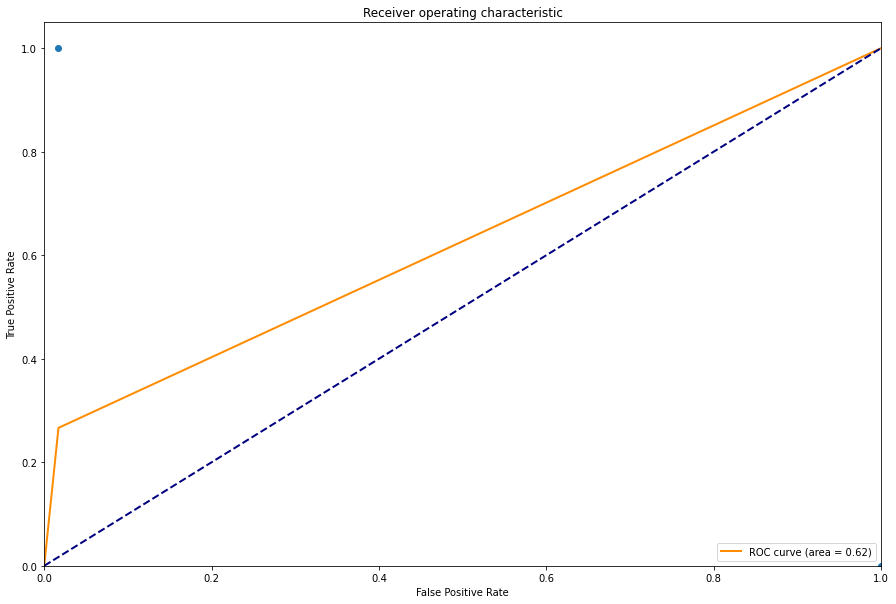

0.6246746780449275

In [9]:
parametros_svm = mejor_combinacion.loc[:].values[0]
svm = SVC( C = parametros_svm[0] , kernel = parametros_svm[1])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)